# PyPho: Camera definition

This notebook demonstrates how to manipulate the CameraRegistry  
and plot basic informations on cameras.

This is defined by the **camera** module,   
which provides a **CameraRegistry** and methods for adding new cameras.

In this example, you'll learn how to:
1. Explore the registry
1. Add new camera and lens
1. Create a Camera instance
1. Plot the camera definition

<p style="text-align:left;">
    Previous page: <a href="./01_minimal_example.ipynb">Minimal example</a>
    <span style="float:right;">
    Next page: <a href="./03_target_objects.ipynb">Target objects</a>
    </span>
</p>

In [1]:
# this is to make pypho available from the local install
import sys
sys.path.append("..")

import pypho
print("Using PyPho version:", pypho.__version__)
from pypho import camera, target, graphics

Using PyPho version: 0.0.4


In [2]:
# to make the figures colorblind friendly, use pyplot default settings for this
import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')

## Visualising the registry

In [3]:
pypho.camera.CameraRegistry.camera_base.head()

,name,sensor_width,sensor_height,nb_pixel_width,nb_pixel_height,pixel_pitch,nb_pixel,MPix
uid,,,,,,,,
A7RIV,Sony Alpha 7RIV,35.7,23.8,9600,6376,0.003719,61209600,61.2


In [4]:
pypho.camera.CameraRegistry.lens_base.head()

,name,focal_min,focal_max,focal_fixed,min_focus_distance
uid,,,,,
FE35,Sony FE 35 mm f/1.4 Zeiss Distagon T*,35,35,True,0.3


## Adding new cameras and lenses

In [5]:
pypho.camera.CameraRegistry.register_camera(
    uid="test", name= "Test Camera",
    sensor_width= 35.7, sensor_height= 23.8,
    nb_pixel_width= 9600, nb_pixel_height= 6376
)

pypho.camera.CameraRegistry.register_lens(
    uid= "test",
    name= "test lens",
    focal_min= 35,
    focal_max= 100,
    min_focus_distance= 0.3 
)

In [6]:
pypho.camera.CameraRegistry.camera_base.head()

,name,sensor_width,sensor_height,nb_pixel_width,nb_pixel_height,pixel_pitch,nb_pixel,MPix
uid,,,,,,,,
A7RIV,Sony Alpha 7RIV,35.7,23.8,9600,6376,0.003719,61209600,61.2
test,Test Camera,35.7,23.8,9600,6376,0.003719,61209600,61.2


In [7]:
pypho.camera.CameraRegistry.lens_base.head()

,name,focal_min,focal_max,focal_fixed,min_focus_distance
uid,,,,,
FE35,Sony FE 35 mm f/1.4 Zeiss Distagon T*,35,35,True,0.3
test,test lens,35,100,False,0.3


## Creating a Camera

### From the registry

In [8]:
a7riv = pypho.camera.CameraRegistry.get_camera("A7RIV","FE35")
print(a7riv.name)

A7RIV


### Directly by its properties

In [9]:
pypho.camera.Camera(sensor_width= 35.7, sensor_height=23.8, nb_pixel_width= 9600, nb_pixel_height= 6376,
       focal= 90, min_focus_distance= 0.3)

In [10]:
# or taking a camera from the registry and lens defined by properties
pypho.camera.Camera(cam_id= "A7RIV",
       focal= 90, min_focus_distance= 0.3)

## Plotting Camera definition

### With a single camera

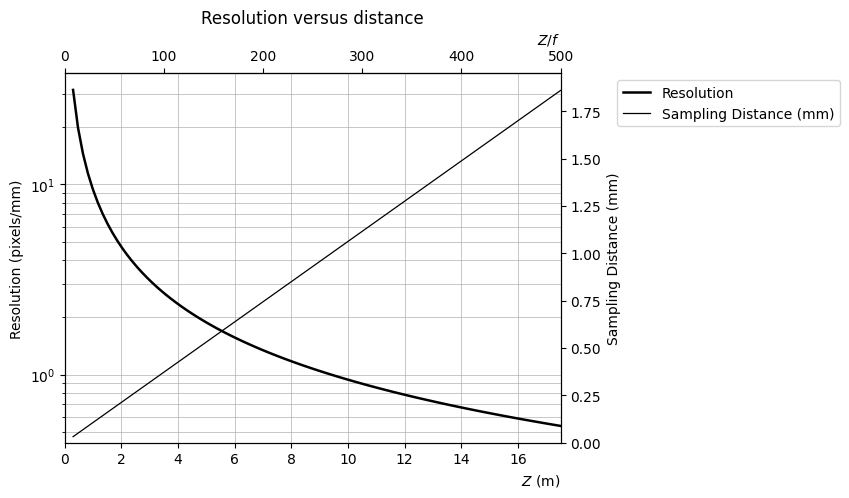

In [11]:
cam = pypho.camera.get_default_camera()

# creating a graph object
graph = pypho.graphics.ResolutionGraph(cam)
graph.plot()

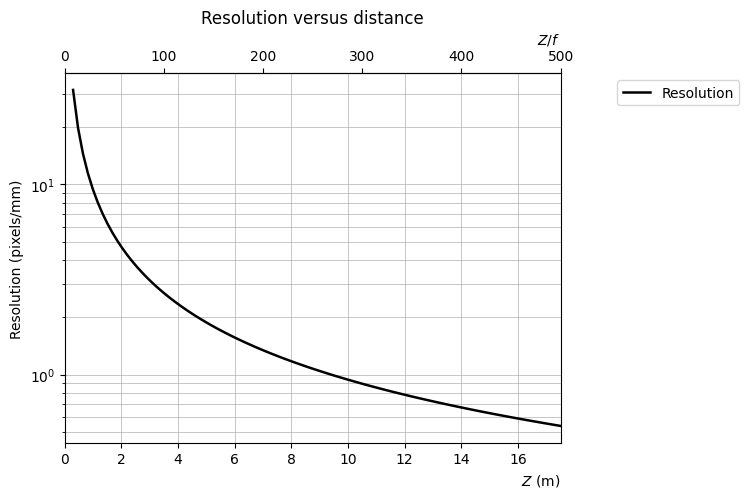

In [12]:
# or directly from the helper function 
pypho.graphics.plot_resolution_graph(cam)

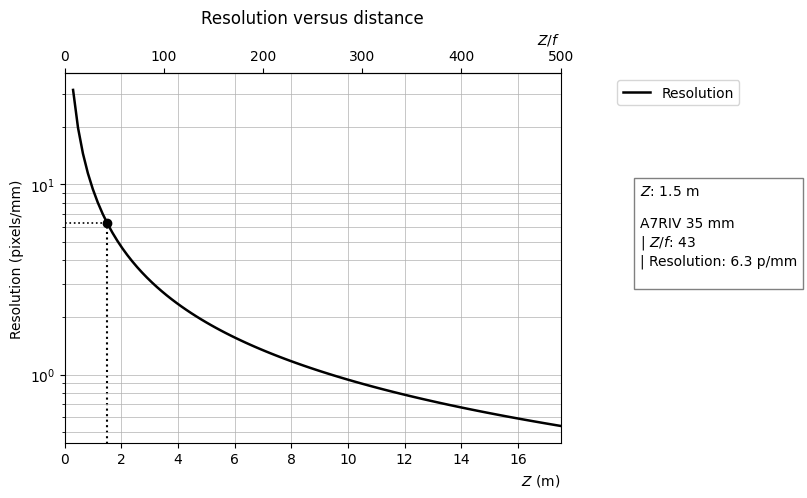

In [13]:
# with information about a reference distance
pypho.graphics.plot_resolution_graph(cam, z_ref= 1.5)

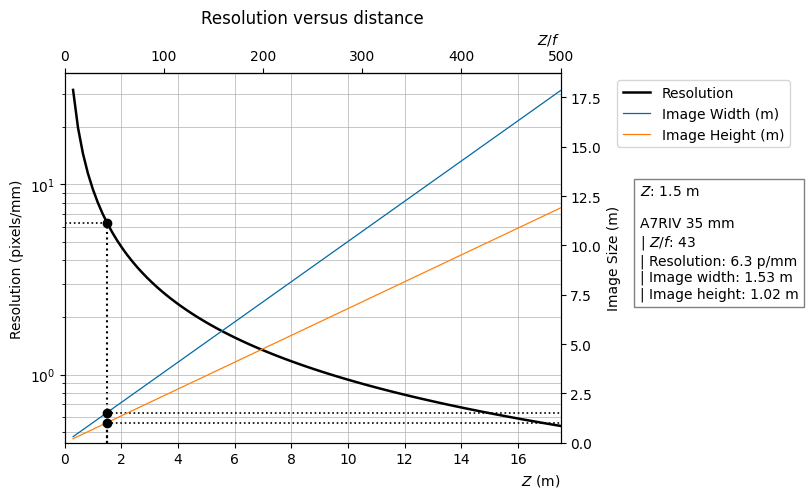

In [14]:
# with information about a reference distance
pypho.graphics.plot_resolution_graph(cam, z_ref= 1.5, second_yaxis= "ImageSize")

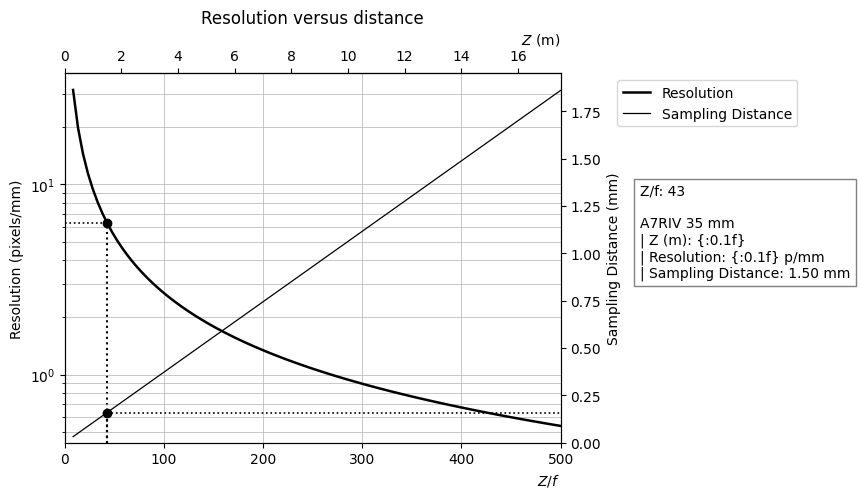

In [15]:
# using Z/F as x axis
pypho.graphics.plot_resolution_graph(cam, z_ref= 1.5, use_z_f_ratio_on_x_axis= True)

### With additional cameras for comparison

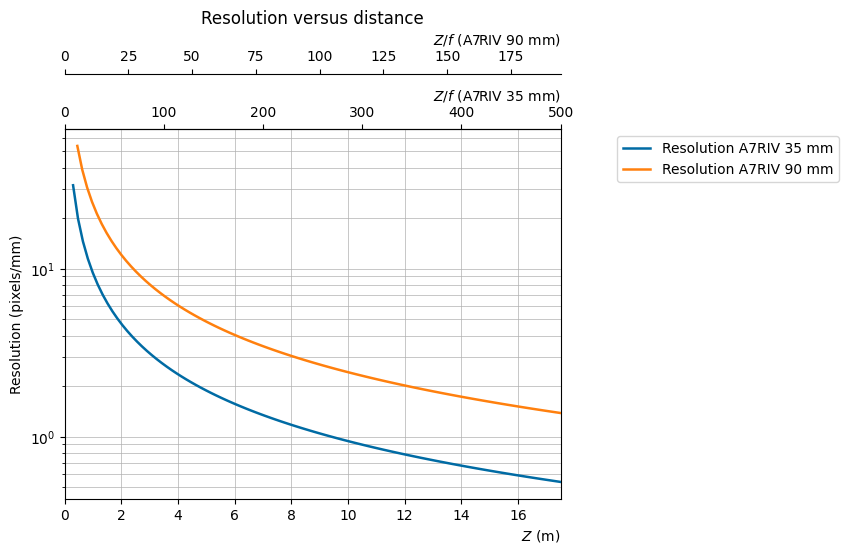

In [16]:
cam2 = pypho.camera.Camera(cam_id= "A7RIV", focal= 90, min_focus_distance= 0.45)
pypho.graphics.plot_resolution_graph(cam, secondary_cam=[cam2])

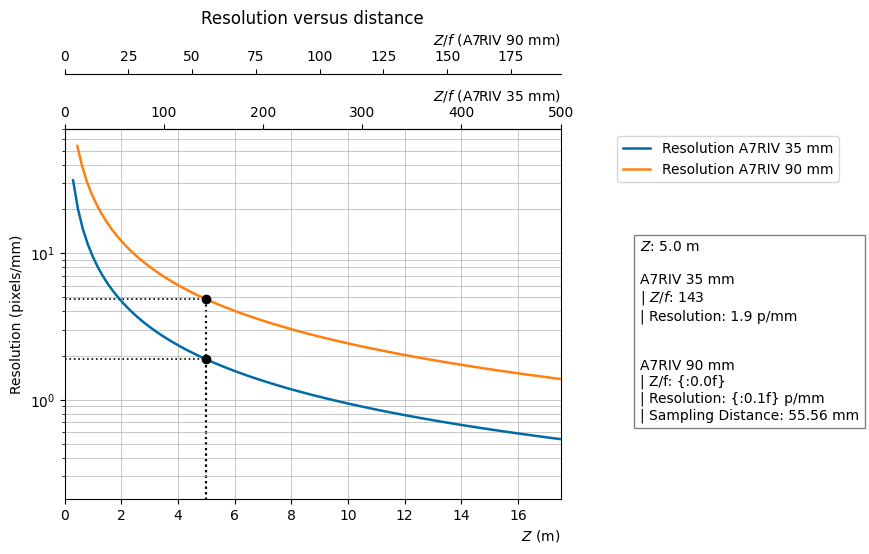

In [17]:
# with reference distance
graphics.plot_resolution_graph(cam, secondary_cam=[cam2], z_ref = 5)

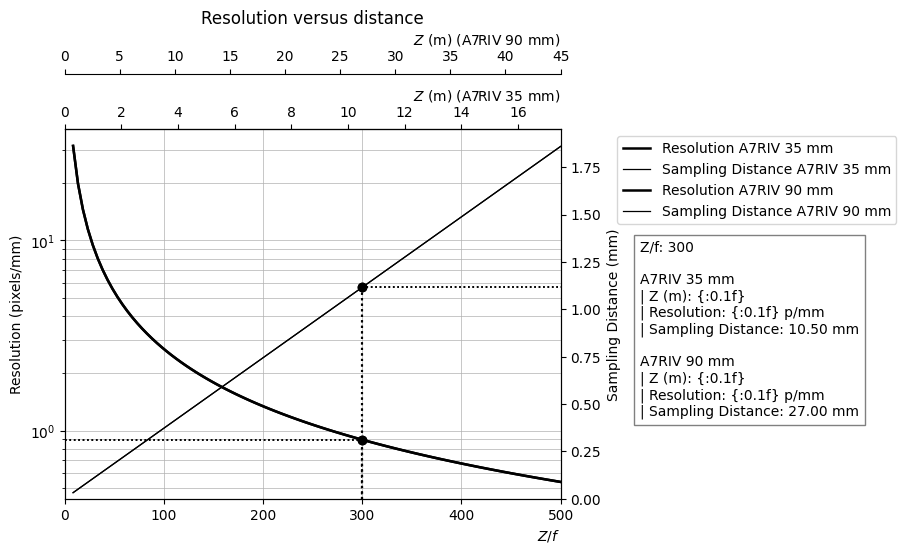

In [18]:
# Z/f in x axis
graphics.plot_resolution_graph(cam, secondary_cam=[cam2], zf_ref = 300, use_z_f_ratio_on_x_axis= True)

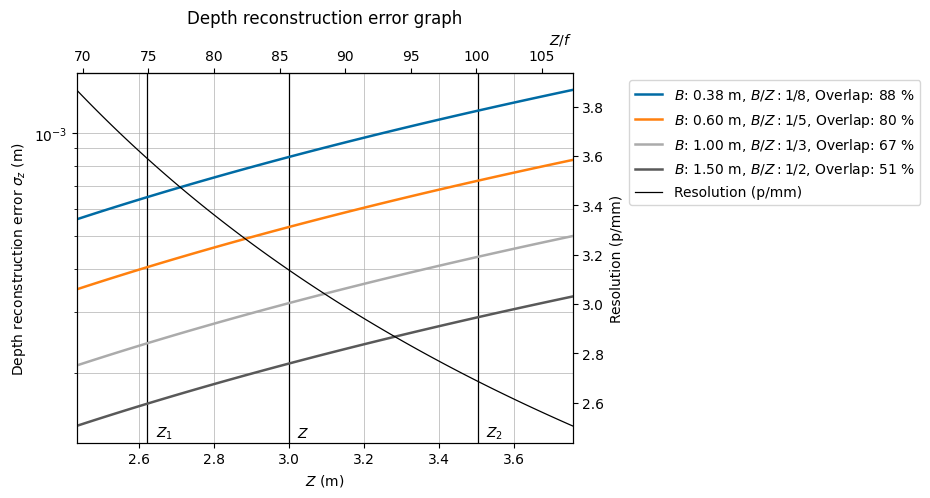

In [19]:
cam = camera.get_default_camera()
cam.update_focus(3)
cam.update_aperture(8)
graph = graphics.DepthPrecisionGraph(cam,
                                     B_Z_ratio= [1/8,1/5,1/3, 1/2],
                                     z_padding_ratio= 0.5,
                                     second_yaxis= "Resolution",
                                     use_log= True,
                                     y_text = 0.00013
                                     )
graph.plot()

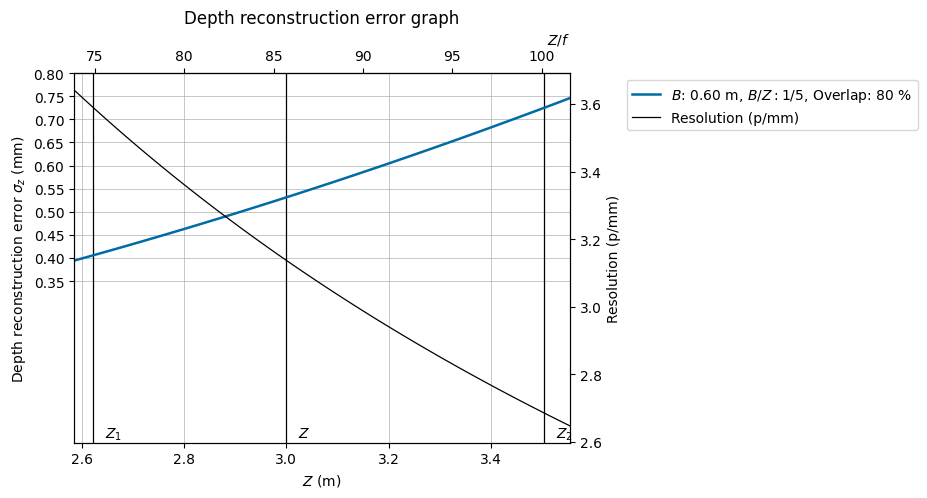

In [26]:
graph = graphics.DepthPrecisionGraph(cam)
graph.plot()

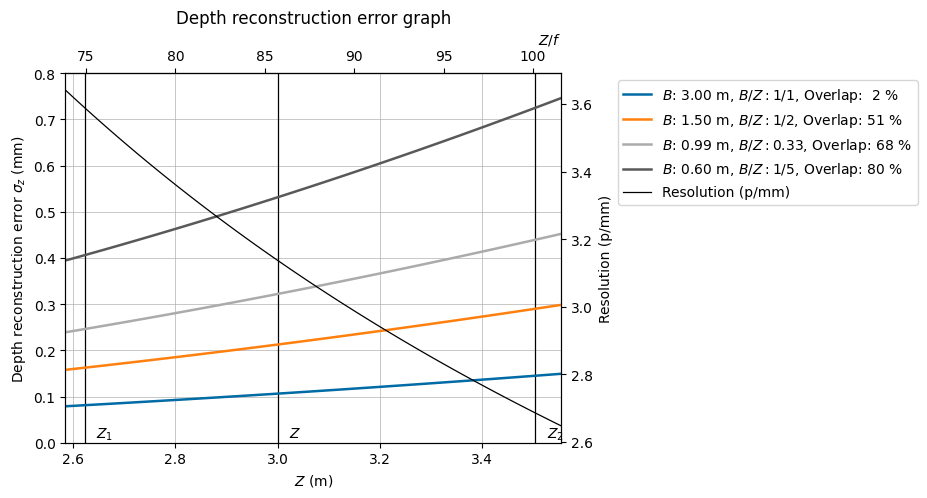

In [24]:
graph = graphics.DepthPrecisionGraph(
    cam,
    B_Z_ratio= [1, 1/2, 0.33, 1/5]
)
graph.plot()

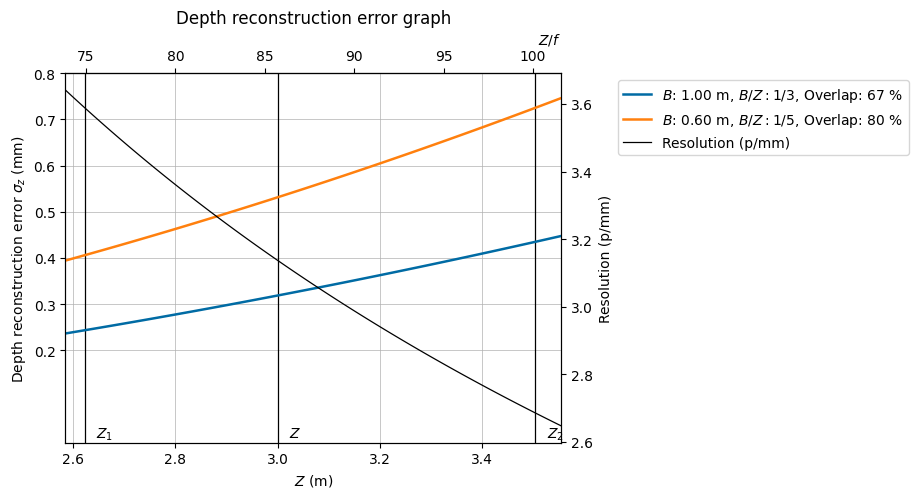

In [28]:
graph = graphics.DepthPrecisionGraph(
    cam,
    B= [1, 0.6],
    use_log= False
)
graph.plot()

## Getting Camera Informations

In [29]:
print(a7riv)

Camera settings:
  shots: []
  target_object: None
  orientation: landscape
  location: [0. 0. 0.]
  yaw: 0
  pitch: 0
  roll: 0
  rotation: <scipy.spatial.transform._rotation.Rotation object at 0x00000246400A1E30>
  dir_vector: [1. 0. 0.]
  w_vector: [0. 1. 0.]
  h_vector: [0. 0. 1.]
  confusion_method: bouillot
  wavelength_nm: 546
  effective_diffraction_disk_ratio: 0.6
  default_baseline: 1
  cam_id: A7RIV
  camera_characteristics: name               Sony Alpha 7RIV
sensor_width                  35.7
sensor_height                 23.8
nb_pixel_width                9600
nb_pixel_height               6376
pixel_pitch               0.003719
nb_pixel                  61209600
MPix                          61.2
Name: A7RIV, dtype: object
  camera_type: Sony Alpha 7RIV
  name: A7RIV
  sensor_width: 35.7 mm
  sensor_height: 23.8 mm
  pixel_pitch: 0.0037187500000000003 mm
  confusion_circle_diameter: 0.0074375000000000005 mm
  lens_id: FE35
  N: 5.66
  lens_characteristics: name           


<p style="text-align:left;">
    Previous page: <a href="./01_minimal_example.ipynb">Minimal example</a>
    <span style="float:right;">
    Next page: <a href="./03_target_objects.ipynb">Target objects</a>
    </span>
</p>